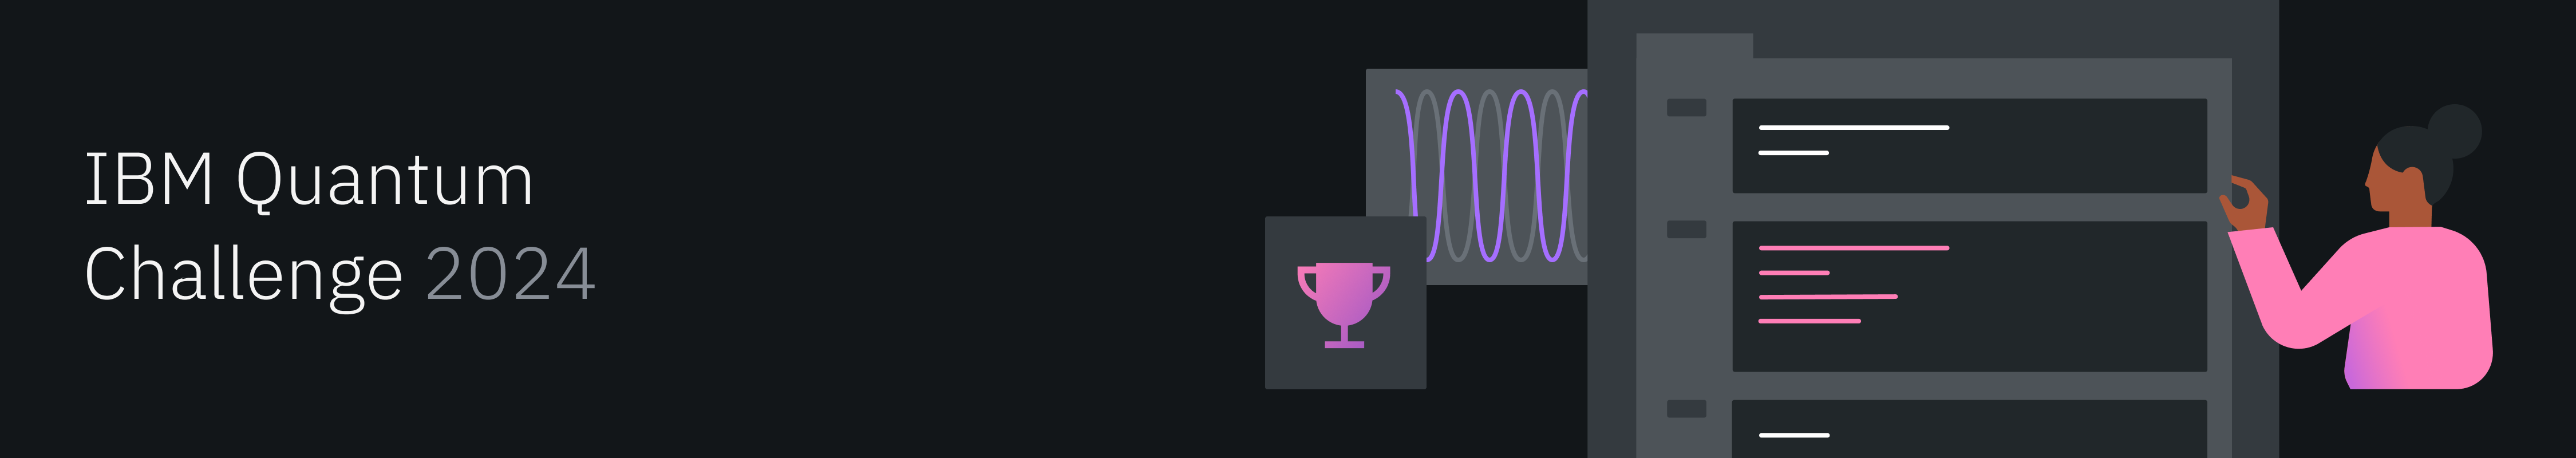

# Bonus Lab: ¡Escalando a 50 qubits!

¿Listo para llevar tus habilidades de computación cuántica al siguiente nivel? ¡Tu próximo desafío es escalar los resultados del Laboratorio 4 a 50 qubits! A medida que el tamaño del sistema crece, necesitaremos optimizar nuestro Clasificador Cuántico Variacional (VQC) y reducir su profundidad. Esto es crucial porque el mapeo utilizado para el estado `GHZ` escala linealmente con el número de qubits. Adaptaremos nuestros circuitos cuánticos para adaptarse a esta escala más grande y te proporcionaremos parámetros óptimos pre-entrenados. Tu tarea es probar la funcionalidad del `VQC` en este rango extendido de qubits.

**¿Por qué es esto importante?** Simular más de 50 qubits es un logro significativo en el mundo cuántico y no muchos se han aventurado a ejecutar circuitos de este tamaño; es una oportunidad única para empujar los límites de lo que se puede lograr en las simulaciones cuánticas.

Ten en cuenta que **este es un laboratorio adicional** destinado solo para aquellos que hayan completado con éxito el Laboratorio 4, ya que se basa directamente en los fundamentos y soluciones que has desarrollado. ¡Sumérgete en este desafío avanzado y únete al grupo de élite que experimenta a este nivel en la computación cuántica!

## Guía

* Step 1: Encuentra una forma eficiente de crear estados GHZ en 50 qubits
* Step 2: Adapta el ansatz `RealAmplitudes` al nuevo mapeo
* Step 3: Verifica los parámetros óptimos utilizando el `AerSimulator`
* **Step final:** Prueba un **VQC de 50 qubits en un dispositivo cuántico (!)**
Comencemos importando todas las bibliotecas que necesitarás en este Laboratorio:

# Imports

In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: qiskit-serverless in c:\users\renat\appdata\local\programs\python\python310\lib\site-packages (0.12.0)



You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\renat\appdata\local\temp\pip-req-build-k1qvcsqu
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1742268fcb91b9f53c7f9ca83d3511adf200f3a9
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\renat\AppData\Local\Temp\pip-req-build-k1qvcsqu'
You should consider upgrading via the 'c:\Users\renat\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Ahora, ejecutemos nuestros imports

In [2]:
# Import all in one cell

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map, plot_circuit_layout, plot_distribution
from qiskit.circuit import ParameterVector

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService, 
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

import warnings
warnings.filterwarnings('ignore')

In [3]:
### Save API Token, if needed

%set_env QXToken=122d96e2ea683466f8d0bf4d1f5ebe5060756c7fbfdda7efe974c0311970d49c52bb898f1efc4cd035a0b5c182adb5309168c8d486b9220336085ca7e121e2f7
# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=122d96e2ea683466f8d0bf4d1f5ebe5060756c7fbfdda7efe974c0311970d49c52bb898f1efc4cd035a0b5c182adb5309168c8d486b9220336085ca7e121e2f7


In [4]:
# qc-grader should be 0.18.13 (or higher)
import qc_grader

qc_grader.__version__

'0.18.13'

In [5]:
from qc_grader.challenges.iqc_2024 import grade_lab_bonus_ex1, grade_lab_bonus_ex2, grade_lab_bonus_ex3

## Step 1: Encuentra una forma eficiente de crear estados GHZ en 50 qubits

Comienza recuperando tu función de incrustación de amplitud del Laboratorio 4:

In [6]:
def old_amplitude_embedding(num_qubits, bird_index):
    """Create amplitude embedding circuit

    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1,num_qubits)):
            qc.cx(i, j)
            
    ### Write your code below here ###
    qc = QuantumCircuit(num_qubits)
    generate_GHZ(qc)

    
    ### Don't change any code past this line ###
    return qc

La generación del estado GHZ en la función anterior `old_amplitude_embedding` escala linealmente con el número de qubits. Puedes comprobarlo utilizando las siguientes celdas del Laboratorio 4:

Depth of two-qubit gates:  49


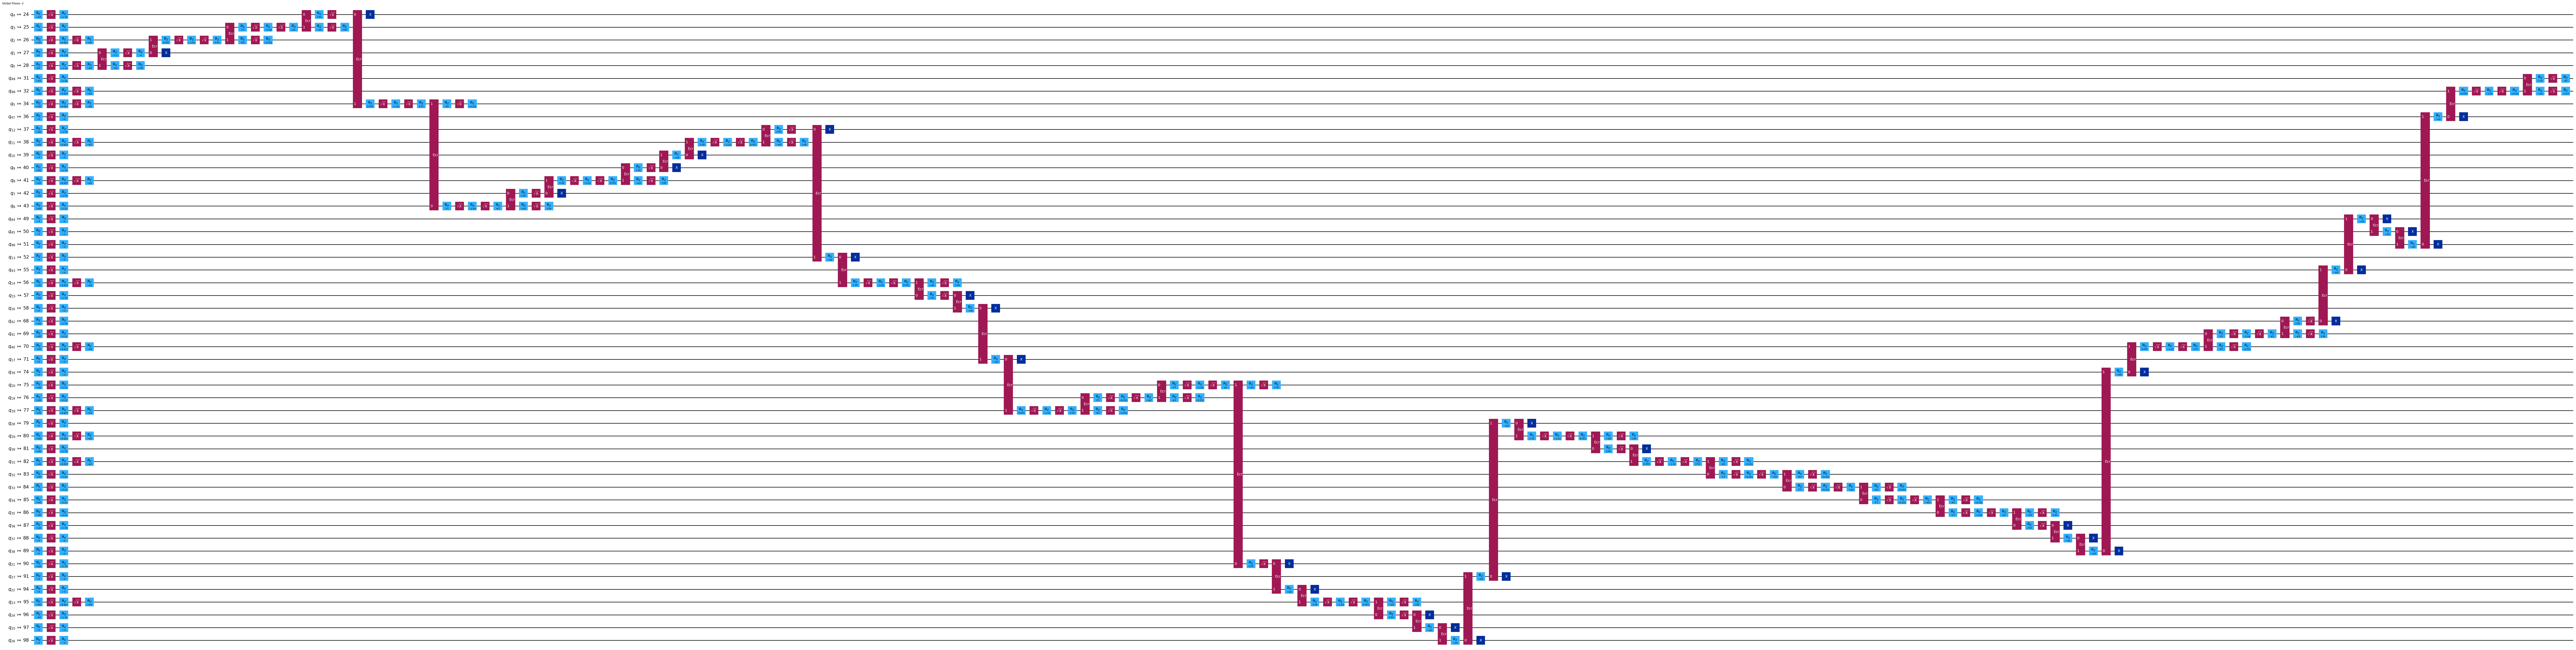

In [7]:
num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 # You can check different birds by changing the index
qc = old_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Si la two-qubit depth es del orden de 50, es demasiado grande!! 

<a id="step1"></a>
<div class="alert alert-block alert-success">

**Tarea:** Encuentra una forma de codificar eficientemente los estados GHZ en un circuito grande y reducir la profundidad de los qubits en parejas del circuito a 13 o menos. Este [artículo de blog](https://dahalegopal27.medium.com/greetings-from-the-ibm-spring-challenge-map-of-127-qubits-ce08817176a7) puede servir de inspiración.

> _El concepto subyacente aprovecha la simetría en los qubits entrelazados. Una vez que dos qubits están entrelazados, sus propiedades simétricas se pueden utilizar para entrelazar qubits adicionales. Este proceso de entrelazamiento en cascada puede ser muy eficiente si el sistema cuántico permite una conectividad total; en tal escenario, crear un estado GHZ que involucre $𝑁$ qubits solo requiere una complejidad asintótica de $(O(\log(N)))$ pasos._

> _Sin embargo, en sistemas con conectividad hexagonal pesada (heavy hex), el proceso es menos eficiente y requiere $(O(\sqrt{N}))$ pasos para lograr lo mismo._

</div>

In [8]:
def new_amplitude_embedding(num_qubits, bird_index):
    """Create efficient amplitude embedding circuit
    
    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
            
    ### Write your code below here ###
    qc = QuantumCircuit(num_qubits)

    # Generate GHZ state efficiently
    qc.h(0)
    step = 1
    while step < num_qubits:
        for i in range(0, num_qubits, 2*step):
            if i + step < num_qubits:
                qc.cx(i, i + step)
        step *= 2

    # Incorporate data (index_bird)
    # Here, you should use bird_index to embed data
    # For demonstration, we'll just apply a rotation based on bird_index
    for i in range(num_qubits):
        qc.ry(bird_index * 0.1, i)
    
    
    ### Don't change any code past this line ###
    return qc

El método `matrix_product_state` [MPS](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html) es más eficiente que una simulación de estado vector completo porque reduce las demandas computacionales y de memoria. Mientras que la simulación de estado vector completo requiere recursos exponenciales en relación al número de qubits, MPS utiliza una representación basada en tensores que escala de manera más favorable, especialmente en sistemas con baja entrelazamiento. Esto permite que MPS realice operaciones más rápidas y con menos memoria en muchos escenarios, lo que lo hace particularmente efectivo para circuitos que no están fuertemente entrelazados y tienen poca profundidad.

**Puedes encontrar más información al respecto en el enlace de la documentación [aquí.](https://qiskit.github.io/qiskit-aer/tutorials/7_matrix_product_state_method.html#id1)**

**Puedes usar la siguiente celda a continuación para verificar que estás mapeando los estados correctos.**

<div class="alert alert-block alert-danger">

**Por favor, ten en cuenta:** Asegúrate de construir correctamente tu estado `GHZ` utilizando el bloque de código a continuación. Prueba experimentar con diferentes valores de índice y asegúrate de obtener un estado `GHZ`.

</div>

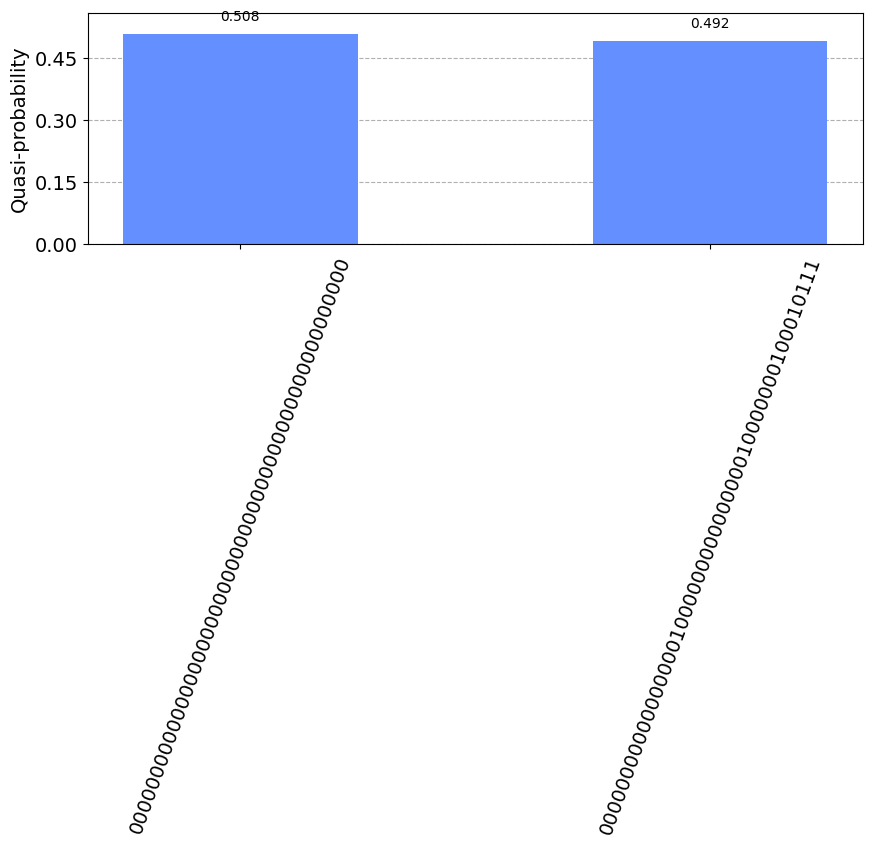

In [9]:
num_qubits = 50
index = 0 # Change to different values for testing
qc = new_amplitude_embedding(num_qubits, index)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(10, 3))

Y puedes verificar la profundidad de dos qubits aquí:

In [10]:
num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 #You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth of two-qubit gates:  48


In [11]:
# Submit your answer using following code
grade_lab_bonus_ex1(new_amplitude_embedding(50,3)) # Expected answer type: QuantumCircuit

Submitting your answer. Please wait...
New amplitude embedding circuit two-qubit depth: 6 < 13 (threshold).
Congratulations! 🎉 Your answer is correct.


## Step 2: Adaptar el ansatz `RealAmplitudes` al nuevo mapeo

El ansatz anterior necesita adaptarse a la nueva conectividad, pero sin aumentar las capas. Verifica que, al transpilar el ansatz con conectividad "pairwise" junto con el "new_amplitude_embedding", el circuito tenga más de **100 capas(!)**.

In [12]:
def generate_old_ansatz(qubits):
    qc = RealAmplitudes(qubits, reps=1, entanglement='pairwise')
    return qc

num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 # You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_old_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
transpiled_qc = pm.run(qc.compose(ansatz))
print('Depth new mapping + old ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
# transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth new mapping + old ansatz:  79


<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Tarea:** Cambia la estructura de entrelazamiento del ansatz `RealAmplitudes` para que la profundidad total de dos qubits del circuito (incrustación + ansatz) se reduzca a **menos de `15` capas**.

*Consejo: Considera el mapeo que has utilizado para el estado `GHZ` en la red de hexágonos pesados y trata de entrelazar los qubits con los vecinos si es posible, con solo 3 capas alternantes.*

</div>  

In [18]:
def generate_ansatz(num_qubits):
    """Generate a `RealAmplitudes` ansatz where all qubits are entangled with each other 
    
    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
    
    Returns:
        qc (QuantumCircuit): Quantum circuit with the generated ansatz
    """
    ### Write your code below here ###



    qc = RealAmplitudes(num_qubits, reps=1, entanglement='linear')

    
    ### Don't change any code past this line ###  
    return qc

##### Ejecuta esta celda para verificar la profundidad total de dos qubits

In [19]:
index_bird = 0 # You can check different birds by changing the index
new_mapping_qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
transpiled_qc = pm.run(new_mapping_qc.compose(ansatz))
print('Depth new mapping + new ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth new mapping + new ansatz:  245


ValueError: Image size of 85151x4381 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 85151.2x4381.22 with 1 Axes>

In [21]:
# Submit your answer using following code
grade_lab_bonus_ex2(transpiled_qc) # Expected answer type: QuantumCircuit

Submitting your answer. Please wait...
Oops 😕! Transpiled circuit two-qubit depth: 245 > 15 (threshold).
Please review your answer and try again.


## Step 3: Verificar los parámetros óptimos utilizando el `AerSimulator`

Ahora necesitamos generalizar los parámetros óptimos para un VQC de 50 qubits.

<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Tarea:** El arreglo de parámetros óptimos debe tener $\pi$ en la primera rotación de `RealAmplitudes` para los qubits que se utilizan para entrelazar otros qubits, y cero en todos los demás.

*Consejo: La forma más sencilla de hacer esto es generar una `source_list` que contenga todos los qubits que se utilizan como fuente para cualquier operación `CX` en el ansatz.*

</div>

In [ ]:
# Generate this to match your ansatz
source_list = # Add your code here

def generalize_optimal_params(num_qubits, ansatz, source_list):
    """Generate a `list of optimal parameters for N qubits 
    
    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
        ansatz (QuantumCircuit): Ansatz for our VQC
        source_list (list): List of qubits used as source to entangle other qubits
    
    Returns:
        opt_params (list): List of optimal parameters generated for N qubits
    """
    
    opt_params = np.zeros(ansatz.num_parameters)
    for i in range(ansatz.num_parameters//2):
        if i in source_list:
            opt_params[i] = np.pi

    return opt_params

<a id="exercise3"></a>
<div class="alert alert-block alert-success">

**Tarea:** Vamos a recuperar las funciones `compute_performance` y `test_shallow_VQC` del Laboratorio 4, tanto para probar con el `AerSimulator` como para un `QPU`. Modifica la función de costo incluyendo un factor `-1`, ya que los parámetros calculados anteriormente están optimizados para la inversa de la función de costo.

**Ten en cuenta:** Debes utilizar las funciones `new_amplitude_embedding` y `generate_ansatz` que creaste anteriormente.

</div>  

In [ ]:
def test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU
    
    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): Real backend from IBM Quantum to run the job
    
    Returns:
        job_id (str): Job ID for Quantum job
    """

    ### Write your code below here ###

    
    ### Don't change any code past this line ###                         
                        
    return job_id

def retrieve_job(job_id):
    """Retrieve test results from job id
    Parameters: 
        job_id (str): Job ID
    Returns:
        results_test (list): List of test results
        errors_test (list): List of test errors
    """
    
    job = service.job(job_id)
    results_test = []
    errors_test = []
    for result in job.result():
        results_test.append(abs(abs(result.data.evs)-1)) #COST FUNCTION HAS A -1 NOW!!!
        errors_test.append(abs(result.data.stds))
        
    return results_test, errors_test

def test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU
    
    Parameters: 
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): AerSimulator backend to run the job
    
    Returns:
        results_test (list): List of test results
    """
    
    results_test = []
    ### Write your code below here ###



     ### Don't change any code past this line ### 
        result = job.result()[0].data.evs
        results_test.append(abs(abs(result)-1)) # COST FUNCTION NOW HAS A -1!!!  
                                           
    return results_test

def compute_performance(result_list, list_labels):
    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels
        
    Returns:
        performance (float): Performance of the classifier
    """
    ### Write your code below here ###


        
    ### Don't change any code past this line ###                                    
    return performance

Ahora estamos listos para verificar si todo funciona utilizando MPS (redes de tensores). Esto es solo para verificar el circuito y no para evaluar su rendimiento, por lo tanto, no estamos transpilando el circuito ni aplicando modelos de ruido.

<div class="alert alert-block alert-danger">

**Por favor, ten en cuenta:** No transpile antes de verificar tu resultado en el código a continuación. Esto es solo una verificación y no una prueba de rendimiento.

</div>

In [ ]:
num_qubits = 50

aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(new_mapping_qc)

list_labels = np.append(np.ones(5), np.zeros(5))
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)
options = EstimatorOptions()

results_test_aer_sim = test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, aer_sim)

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data MPS')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
print(f"Performance for resilience 0: {compute_performance(results_test_aer_sim, list_labels)}")
ax.plot(results_test_aer_sim, 'o-', color='tab:red', label='MPS Num qubits = ' + str(num_qubits))
ax.plot(list_labels, 'k-', label='Labels')
ax.legend()

In [ ]:
# Submit your answer using following code
grade_lab_bonus_ex3(results_test_aer_sim) # Expected variable types: List

## Final step: Prueba de un VQC de 50 qubits en un dispositivo cuántico (!)

En este punto, deberías estar listo para ejecutar tu VQC en un dispositivo real. Comencemos eligiendo nuestro dispositivo. Para esta parte del laboratorio, recomendamos elegir un backend de IBM Quantum al que tengas acceso, ya que utilizaremos estas simulaciones como guía para ejecutar el código en el backend real más adelante. Ten en cuenta que las propiedades de los dispositivos pueden variar mucho de uno a otro, por lo que la prueba del VQC puede no funcionar tan bien para ciertos dispositivos. Hemos utilizado [ibm_sherbrooke](https://quantum.ibm.com/services/resources?system=ibm_sherbrooke).

Puedes encontrar la lista de sistemas a los que tienes acceso en [la pestaña de Sistemas](https://quantum.ibm.com/services/resources?resourceType=current-instance&order=queue%20ASC&view=table) en la plataforma IBM Quantum o ejecutar el siguiente código:

```python
    from qiskit_ibm_runtime import QiskitRuntimeService

    service = QiskitRuntimeService()
    # list all available systems
    service.backends()
    # get the least busy system
    backend = service.least_busy()
```


<div class="alert alert-block alert-danger">

**Please note:** Please perform the checks above before running it on the real device to ensure you make the best use of your QPU time.

</div>

In [ ]:
service = QiskitRuntimeService()
backend = service.backend("select_your_device")

Especifiquemos las opciones para nuestra ejecución en un sistema real. Puedes revisar las explicaciones sobre `options` en [Lab 4](https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_bonus/lab-bonus.ipynb#Zero-Noise-Extrapolation-(ZNE))

Más detalles sobre cómo configurar `options` para la mitigación de errores con Qiskit Runtime se pueden encontrar en [este tutorial](https://learning.quantum.ibm.com/tutorial/combine-error-mitigation-options-with-the-estimator-primitive) así como en [la documentación](https://docs.quantum.ibm.com/run/configure-error-mitigation).

<div class="alert alert-block alert-danger">

**Ten en cuenta:** Para `10000` ejecuciones, el tiempo estimado de ejecución es de aproximadamente 4 minutos y para `5000` 

</div>

In [ ]:
# RUN JOBS
num_qubits = 50
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)

for resilience in [0,1]:

    DD = True
    options = EstimatorOptions(default_shots = 5_000, 
                            optimization_level=0, 
                            resilience_level=resilience)  
    options.dynamical_decoupling.enable = DD
    options.dynamical_decoupling.sequence_type = 'XpXm'

    # OPTIONAL
    # options.resilience.zne_mitigation = True
    # options.resilience.zne.noise_factors = (1, 1.2, 1.5)
    # options.resilience.zne.extrapolator = ('exponential', 'linear', 'polynomial_degree_2') #order matters

    job_id = test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend)

##### Puedes usar la celda de abajo para graficar tus resultados

In [ ]:
results_test_0_DD, errors_test_0_DD = retrieve_job('Enter your JobID for resilience level 0') 
results_test_1_DD, errors_test_1_DD = retrieve_job('Enter your JobID for resilience level 1') 

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title(f'Test of a {num_qubits} qubit VQC on {backend.name}')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

print(f"Performance for no DD + no TREX: {compute_performance(results_test_0_DD, list_labels):.3f}")
print(f"Performance for DD + TREX: {compute_performance(results_test_1_DD, list_labels):.3f}")
ax.errorbar(range(10), results_test_0_DD, fmt='--o', yerr=errors_test_0_DD, color='tab:orange', label=f'{backend.name} RL=0 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')
ax.errorbar(range(10), results_test_1_DD, fmt='--o',  yerr=errors_test_1_DD, color='tab:blue', label=f'{backend.name} RL=1 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')

ax.plot(list_labels, 'k-', label='Labels')

ax.legend() 

##### Tus resultados deberían verse similares a los siguientes. Este es un trabajo anterior ejecutado usando `ibm_kyiv`

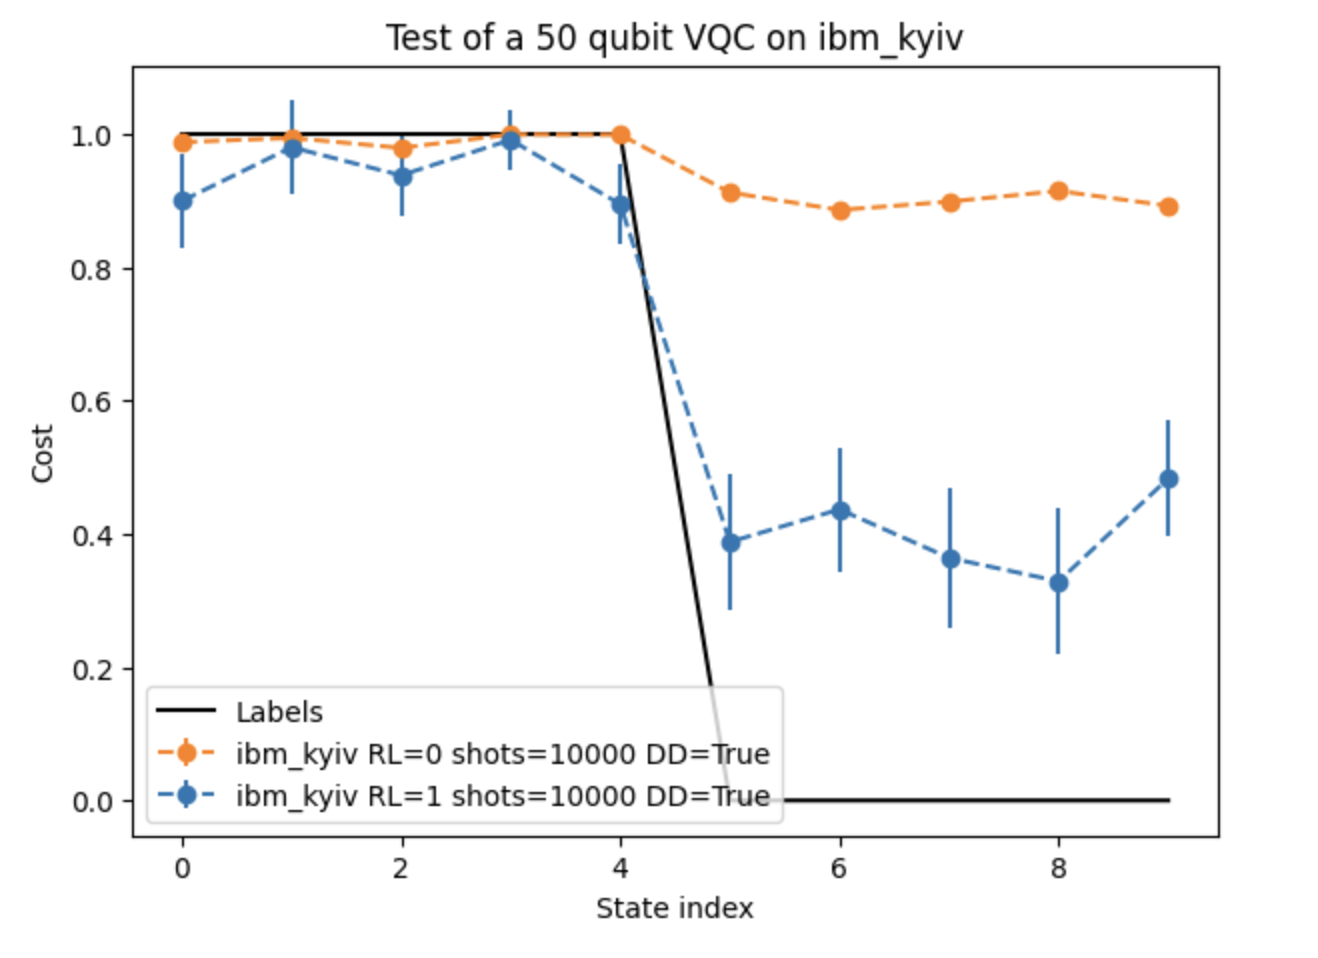

# Additional information

**Created by:** Joana Fraxanet, Marcel Pfaffhauser, Junye Huang, Vishal Sharathchandra Bajpe

**Advised by:** Pedro Rivero

**Translated by:** Guillermo Abad

**Version:** 1.0.0